In [23]:
# Code for unsteady 2D diffusion. 

%matplotlib notebook
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [38]:
#Define thermal conductivity:
k = 1e-2;

# Define grid parameters
Xmin = 0.0; Xmax = 1.0
Ymin = 0.0; Ymax = 1.0
ng = 21;
mx = ng; my = ng;

dh = (Xmax-Xmin)/(ng-1);
x = numpy.arange(Xmin, Xmax+dh, dh);
y = numpy.arange(Ymin, Ymax+dh, dh);

# Define time parameters
Tmin = 0.0; Tmax = 20.0;
dt = 1e-2;
ntime = int((Tmax-Tmin)/dt);

A = numpy.zeros((ng,ng));
b = numpy.zeros(ng);
T = 100.0*numpy.ones((ng, ng));
Tnew = numpy.zeros_like(T);

#Define solution parameters:
tol = 1.0E-6; Err = 1.0E10;

In [39]:
#Define A matrix
#First, interior points
for i in range (1,ng-1):
    A[i,i-1:i+2] = [-1, 4, 1];

#Define boundary points
A[0,0] = 1; A[-1,-1] = 1;

In [40]:
# Boundary conditions on temperature
T[0,:] = 100; T[-1,:] = 300; 
T[:,0] = 100; T[:,-1] = 300;


#Start solving equation
for iter in range (ntime):
    
    for i in range (1, ng-1):
        for j in range (1, ng-1):
            Tnew[i,j] = T[i,j] + k*dt/(dh*dh)* \
            (T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1]-4*T[i,j])
    
    # Impose boundary conditions
    Tnew[0,:] = 100; Tnew[-1,:] = 300; 
    Tnew[:,0] = 100; Tnew[:,-1] = 300;
    
    #Copy new values into old arrays
    T = numpy.copy(Tnew);
    #print(T[-2,-2]);

In [41]:
ng, ng = numpy.meshgrid(x,y)

<IPython.core.display.Javascript object>


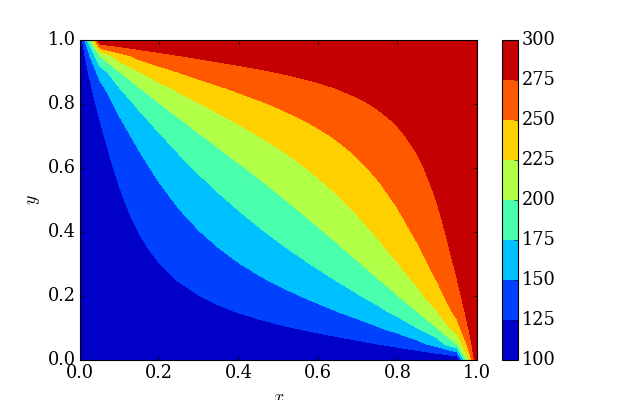

In [42]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,Tnew)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();